# K-Means

In [1]:
import numpy as np
from random import *
import matplotlib.pyplot as plt

k = 4
X = []
for _ in range(30):
    X.append([uniform(0,50),uniform(0,50)])

#X = [[0,1],[2,3],[3,4],[5,2],[4,14],[6,0],[15,10],[11,10],[13,5],[10,4],[7,7],[7,0]]

In [2]:
class meuKMeans:
    
    def __init__(self, k = 2, tol = 0.0001 , max_inter = 100):
        self.k = k
        self.tol = tol
        self.n_inter = 0
        self._centros = []
        self.max_inter = max_inter
        self.classes = {}
 

    def fit(self, X):
        
        c = [] #centros
        dist_xi = []
     
        for i in range (self.k): #centros iniciais aleatorios
            
            c.append([uniform(0,55), uniform(0,55)])
            self.classes.setdefault(i+1,[])
       # c = [[2,5],[0,0],[6,3]]
        #self.classes.setdefault(1,[])
       # self.classes.setdefault(2,[])
        #self.classes.setdefault(3,[])
        
        for _ in range(self.max_inter):# centros alteram de acordo com a media
            
            for i in self.classes.keys():
                self.classes[i].clear()
                
            
           
            for xi in X:
                i = 0
                aux = 0
                dist_atual = 100000
                dist = 100000
                dist_classes = []
                for ci in c:#para cada xi calcula se a distancia a cada centro
                    dist_atual = np.sqrt(np.sum(np.subtract(xi,ci)**2))#distancia euclidiana
                    #dist_atual = np.sum(np.abs(np.subtract(xi,ci)))
                    #print(dist_atual)
                    dist_classes.append(dist_atual)
                    pos = 0
                    menor = 10000000
                    for j in range(len(dist_classes)):
                        if menor > dist_classes[j]:
                            menor = dist_classes[j]
                            pos = j + 1;
                    i = pos
                    #print('ponto:',xi,' centro =',ci,'->',dist_atual,'  classe[',pos,']') 
                #print('---------------------------------------------------------')
                    
                self.classes[i].append(xi)
                
            #print("\n",self.classes)
            for k in self.classes.keys() :
                c[k-1] = [0,0]
                for v in self.classes[k]:

                    c[k-1] = np.add(c[k-1],v)
                
                if len(self.classes[k]) != 0:
                    c[k-1] = c[k-1]/ np.array(len(self.classes[k]))
                if len(self.classes[k]) == 0:
                    c[k-1] = c[k-1]/ np.array(1)
                #print('*',self.classes[k])
                
        self._centros = c
           
        pass  
    
    def predict(self, X):
        
        
        return 0

In [3]:
clf = meuKMeans(k = k , max_inter = 1000)
clf.fit(X)

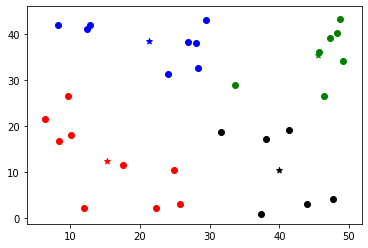

In [4]:
i = 0
cores = {1:'black',2:'blue',3:'red',4:'green',5:'yellow',6:'pink',7:'gray',8:'purple'}

for p in clf.classes.keys():
    for x in clf.classes[p]:
         plt.scatter(x[0],x[1],color = cores[p])
            
for i in range(len(clf._centros)):
    plt.scatter(clf._centros[i][0],clf._centros[i][1],color = cores[1+i],marker = '*')
    
#plt.scatter(xi,yi,color = 'black')#'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'


In [5]:
clf._centros

[array([40.00296615, 10.44237591]),
 array([21.27244783, 38.4740511 ]),
 array([15.211507  , 12.42431181]),
 array([45.59000709, 35.40898708])]

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='random'  ,n_clusters=k, random_state=0 , verbose=0).fit(X)

In [7]:
import matplotlib.pyplot as plt
xi,yi = [], []
c1,c2 = [] , [] 
for i in (X):
    xi.append(i[0])
    yi.append(i[1])

for i in kmeans.cluster_centers_:
    c1.append(i[0])
    c2.append(i[1])
 


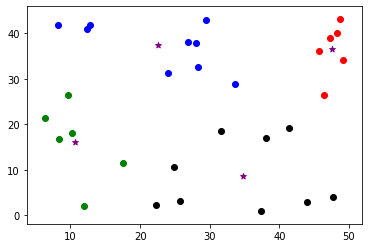

In [8]:
for i in range(len(xi)):
    if kmeans.predict([[xi[i],yi[i]]]) == 0:
        plt.scatter(xi[i],yi[i],color = 'black')
    elif kmeans.predict([[xi[i],yi[i]]]) == 1:
        plt.scatter(xi[i],yi[i],color = 'red')
    
    elif kmeans.predict([[xi[i],yi[i]]]) == 2:
        plt.scatter(xi[i],yi[i],color = 'blue')
        
    elif kmeans.predict([[xi[i],yi[i]]]) == 3:
        plt.scatter(xi[i],yi[i],color = 'green')
    elif kmeans.predict([[xi[i],yi[i]]]) == 4:
        
        plt.scatter(xi[i],yi[i],color = 'orange')
    elif kmeans.predict([[xi[i],yi[i]]]) == 5:
        
        plt.scatter(xi[i],yi[i],color = 'gray')
    elif kmeans.predict([[xi[i],yi[i]]]) == 6:
        
        plt.scatter(xi[i],yi[i],color = 'gold')

#plt.scatter(xi,yi,color = 'black')#'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'
plt.scatter(c1,c2,color = 'purple', marker='*')
plt.show()

In [9]:
kmeans.cluster_centers_

array([[34.76110537,  8.71495467],
       [47.5938571 , 36.50514046],
       [22.63849886, 37.40271952],
       [10.67856859, 16.00641162]])